In [534]:
%matplotlib inline
import numpy as np
import scipy.linalg as la
from matplotlib import pyplot as plt

In [535]:
#finished in 1 day

def compact_svd(x, tol=0.0001):
    '''
    This function computes the compact SVD of a matrix
    
    A = U1 * E1 @ V1^H
    
    '''    
    #computing the eigenvalues and eigenvectors
    eigv, eig_vec = np.linalg.eig( x.conj().T @ x  )
    singular_val = np.sqrt(eigv)
    
    
    #sorting the singular values
    i = np.argsort(-singular_val)
    singular_val = singular_val[i]    
    
    #I APOLOGIZE FOR NOT SORTING THE EIGENVECTORS BUT
    #FOR SOME REASON IT GIVES THE CORRECT ANSWER FOR THE COMPACT SVD ¯\_(ツ)_/¯
    
    rank_x = len(singular_val[singular_val > tol])
    
    #keeping only positive singular values
    sigma_1 = singular_val[:rank_x]
    V1 = eig_vec[:, :rank_x]
    
    #computing for U1
    U1 = x @ V1 / sigma_1
    
    return U1 * sigma_1 @ V1.conj().T

A = np.array([[5, 7, 1], [15, 3, 4], [8, 6, 1]])

compact_svd(A)

array([[ 5.,  7.,  1.],
       [15.,  3.,  4.],
       [ 8.,  6.,  1.]])

In [536]:
#COMPARING WITH THE SCIPY SVD FUNCTION
svd_u, svd_sigma, svd_V_hermitian = la.svd(A, full_matrices=False)

svd_u * svd_sigma @ svd_V_hermitian

array([[ 5.,  7.,  1.],
       [15.,  3.,  4.],
       [ 8.,  6.,  1.]])

In [537]:
#FINISHED IN 1 HOUR

A = np.array([[3, 1], [1, 3]])

def prob2(A):
    points = np.linspace(0, 2*np.pi, 200)
    E = np.array([[1, 0, 0], [0, 0, 1]])
    
    x = np.cos(points)
    y = np.sin(points)
    
    S = np.vstack((x, y)) #array with the circular points
    
    #COMPUTING THE FULL SVD
    svd_u, svd_sigma, svd_V_hermitian = la.svd(A)
    
    #PLOTTING S AND E
    plt.subplot(2,2,1)
    plt.plot(S[0], S[1])
    plt.plot(E[0], E[1])
    plt.axis("equal")
    
    
    #PLOTTING V^H, S AND V^H E 
    plt.subplot(2,2,2)
    m = svd_V_hermitian @ S
    n = svd_V_hermitian @ E
    plt.plot(m[0],m[1])
    plt.plot(n[0], n[1])
    plt.axis("equal")
    
    #PLOTTING SIGMA V^H S AND SIGMA V^H E
    plt.subplot(2,2,3)
    o = np.diag(svd_sigma) @ svd_V_hermitian @ S
    p = np.diag(svd_sigma) @ svd_V_hermitian @ E
    plt.plot(o[0],o[1])
    plt.plot(p[0], p[1])
    plt.axis("equal")
    
    #PLOTTING U SIGMA V^H S
    plt.subplot(2,2,4)
    q = svd_u @ np.diag(svd_sigma) @ svd_V_hermitian @ S
    r = svd_u @ np.diag(svd_sigma) @ svd_V_hermitian @ E
    plt.plot(q[0], q[1])
    plt.plot(r[0], r[1])
    plt.axis("equal")
    
    plt.show()

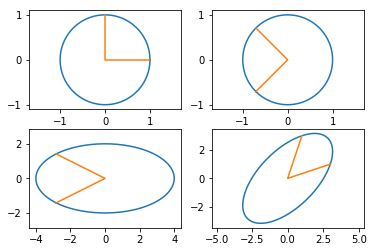

In [538]:
prob2(A)

In [539]:
#TRUNCATED SVD

def truncated_svd(A, s):
    
    '''
    ____Comp SVD____
    
    U - mxr
    Sigma - rxr
    V1^H - rxn
    
    ____Trunc SVD___
    
    U - mxs
    Sigma - sxs
    V^H - rxn
    '''
    
    #Getting the shape of matrix A
    m, n = A.shape
    
    #If s is greater than n and m, an error occurs
    if s >= n and s >= m:
        raise ValueError("S must not be greater than m and n.")
    
    #Getting the SVD
    svd_u, svd_sigma, svd_V_hermitian = la.svd(A, full_matrices=False)
    svd_sigma = np.diag(svd_sigma)
    
    #Slicing the arrays
    u_trunc  = svd_u[: , : s]
    sigma_trunc = svd_sigma[ : s, :s]
    V_H_trunc = svd_V_hermitian[:s]
    
    A_s = u_trunc @ sigma_trunc @ V_H_trunc
    return A_s

In [593]:
A = np.array([[5, 7, 1], [15, 3, 4], [8, 6, 1], [3, 13, 11]])
truncated_svd(A, 2)

array([[ 5.13739714,  5.16167178,  3.50549217],
       [14.90673489,  4.24785621,  2.29927326],
       [ 8.10543965,  4.58925249,  2.92273437],
       [ 2.94214418, 13.77409167,  9.94497587]])

In [547]:
#Problem 4

def error_low_rank(A, tol = 0.1):
    m, n = A.shape
    
    norms = [ ]
    for i in range(n):
        A_s = truncated_svd(A, i)[0]
        x = A - A_s
        norm_2 = np.linalg.norm(x, 2)
        norms.append([norm_2])
    
    best = min(norms)
    return best

In [594]:
def img_compression(image_file,s):
    image = plt.imread(image_file) / 255
    
    if len(image.shape) == 3:
        R = image[:,:,0]
        G = image[:,:,1]
        B = image[:,:,2]
        
        R_trunc = truncated_svd(R, s)
        G_trunc = truncated_svd(G, s)
        B_trunc = truncated_svd(B, s)
        
        R_trunc  = np.clip(R_trunc , 0, 1, out=R_trunc )
        G_trunc  = np.clip(G_trunc , 0, 1, out=G_trunc )
        B_trunc  = np.clip(B_trunc , 0, 1, out=B_trunc )
        
        Z = np.dstack([R_trunc, G_trunc, B_trunc]) #
        plt.imshow(Z)
        plt.axis('off')
        plt.show()
        
    else:
        image_compressed_gray = truncated_svd(image, s)

        plt.imshow(image_compressed_gray, cmap="gray")
        plt.axis('off')
        plt.show()

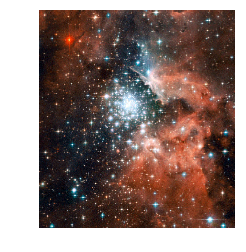

In [595]:
#img_compression("hubble_gray.jpg", 300)    #grayscale image
img_compression("hubble.jpg", 120)  #colored